# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The purpose of this project is to study data collected over the last few years and determine which factors influence the price of a vehicle. This will be done by firstly, cleaning the data, checking the data then lastly visualising the data.

## Initialization

Below are the libraries that are used in this project.

In [93]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/ExploratoryDataAnalysis/vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# print the general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
display(df.head(20))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:

df.duplicated().value_counts()

False    51525
dtype: int64

In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

There are 51252 data entries in the dataset.The 'model_year' column has missing values and it is a float value where it should be an integer because it is the year.The odermeter,cylinders and paint_color columns have missing values. The is_4wd column has NaN values for vehicles that do not have 4 wheel drive. There are no duplicates in the dataset.

The model_year, is_4wd and date_posted columns have incorrect data types. The model_year and is_4wd columns should be integers and the date_posted column should be a datetime type.

### Conclusions and further steps

In conclusion there are a few columns in the data that have missing values. These missing values have to be replaced according to the other columns and/or other values. There are no duplicates in the dataset. This is good as it means no data has to be removed from the dataset thus far.

In the next steps we will treat the missing values in the data set, add a few column to help us explain and work with the data easier then lastly we will start visualising the data to make better sense of it.

## Treat missing values (if any)

In [8]:
# model_year missing values
display(df[df['model_year'].isna()])


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


<AxesSubplot:ylabel='Frequency'>

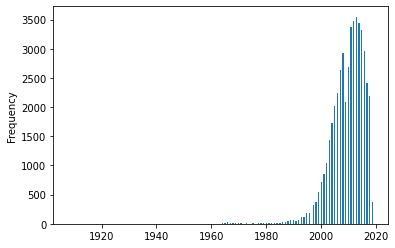

In [9]:
df['model_year'].plot(kind='hist',bins=227)

In [10]:
df_condition_agg = df.groupby('model')['model_year'].transform('median')
df['model_year'] = df['model_year'].fillna(df_condition_agg)

In [11]:
df['model_year'].isna().sum()

0

In the above cells we look at the 'model_year' column and address the missing values in this column. The missing values in this column were replaced with the median as there are outliers in this column that push the mean back. It is also seen that cars from 2000 and 2022 are the most cars in the market.

In [12]:
#cylinders missing values
display(df[df['cylinders'].isna()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


<AxesSubplot:xlabel='cylinders', ylabel='type'>

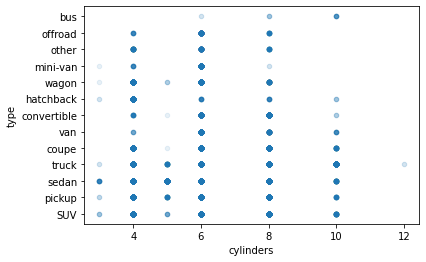

In [13]:
df.plot(x='cylinders',y='type',kind='scatter',alpha=0.1)

In [14]:
median_cylinder = df.groupby('type')['cylinders'].transform('median')
df['cylinders'] = df['cylinders'].fillna(median_cylinder)

In [15]:
df['cylinders'].isna().sum()

0

In the cells above we look at the 'cylinders' column. The missing values in this column were replaced with the median of each type of car with a certain number of cylinders in it's engine so the right value is given to the right type of vehicle.

In [16]:
#odometer missing values
display(df[df['odometer'].isna()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


<AxesSubplot:ylabel='Frequency'>

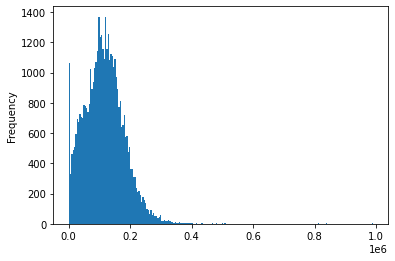

In [17]:
df['odometer'].plot(kind='hist',bins=227)

<AxesSubplot:xlabel='model_year', ylabel='odometer'>

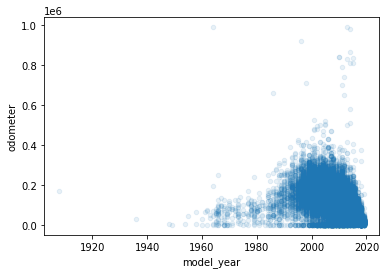

In [18]:
df.plot(x='model_year',y='odometer',kind='scatter',alpha=0.1)

In [19]:
df[df['odometer'].isna()]['model_year'].value_counts()

2013.0    645
2012.0    613
2011.0    612
2008.0    558
2014.0    557
2015.0    519
2010.0    460
2016.0    455
2007.0    406
2017.0    381
2009.0    369
2018.0    343
2005.0    330
2006.0    321
2004.0    252
2003.0    216
2002.0    162
2000.0    138
2001.0    130
1999.0     78
1998.0     61
1997.0     55
2019.0     52
1996.0     26
1995.0     24
1993.0     22
1994.0     19
1989.0     14
1986.0      8
1992.0      8
1990.0      8
1991.0      5
2006.5      4
1968.0      4
1966.0      4
1988.0      4
1970.0      3
1977.0      3
2010.5      3
1983.0      2
1978.0      2
1929.0      1
1960.0      1
1964.0      1
1974.0      1
1976.0      1
1975.0      1
1987.0      1
1973.0      1
1985.0      1
1971.0      1
1980.0      1
1979.0      1
1982.0      1
1908.0      1
1981.0      1
1963.0      1
Name: model_year, dtype: int64

In [20]:
median_odometer = df.groupby('condition')['odometer'].transform('median')
df['odometer'] = df['odometer'].fillna(median_cylinder)

In [21]:
df['odometer'].isna().sum()

0

In the above cells we look at the 'odometer' column. In this column the missing values are replaced with the median odometer value of vehicles that have the same model year. This is done to give a more realistic replacement of the odemeter of a certain vihicle.

In [22]:
#paint missing values
display(df[df['paint_color'].isna()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,8.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,6.0,automatic,coupe,NaN,NaN,2018-11-24,89


In [23]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [24]:
df['paint_color'].fillna('unknown',inplace=True)

In [25]:
df['paint_color'].isna().sum()

0

In the cells above we look at the 'paint_color' column. In this column the missing values are just replaced with the color white as this is the color that most cars have and it is a bit challenging to predict why a certain car should be a certain colour as this is very subjective.

In [26]:
#is_4wd missing values
display(df[df['is_4wd'].isna()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,8.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [27]:
df['is_4wd'].fillna(0,inplace=True)

In [28]:
df['is_4wd'].isna().sum()

0

In the above cells we look at the 'is_4wd' column. In this column the missing values are the rows of vehicles that do not have four wheel drive. Therefore these missing values are replaced with a zero as a symbol of false or no.

## Fix data types

In [29]:
#the price data type is changed to a float
df['price'] = df['price'].astype('float')

In [30]:
#the model_year data type is changed to datetime
df['model_year'] = pd.to_datetime(df['model_year'],format="%Y")
df['model_year'] = pd.DatetimeIndex(df['model_year']).year

In [31]:
#the is4wd data type is changed to a boolean
df['is_4wd'] = df['is_4wd'].astype('bool')

In [32]:
#the date_posted data type is changed to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'],format='%Y-%m-%d')

In [33]:
df['cylinders'] = df['cylinders'].astype('int')

## Enrich data

In these cells we add columns to the dataset to make analysis a bit easier. 
'age_years' - is the number of years the vehicle is until it is put on the market.
'avg_milage_per_year' -  is the vehicles annual average milage.
'condition_rank' - is the condition of the vehicle in rating from 0-5.

In [34]:
# Add the vehicle's age when the ad was placed
df['age_years'] = (pd.DatetimeIndex(df['date_posted']).year)-df['model_year']

In [35]:
# Add the vehicle's average mileage per year
for x in df['age_years']:
    if x >= 1:
        df['avg_milage_per_year'] = (df['odometer']/x).round()
    else:
        df['avg_milage_per_year'] = df['odometer'].round()


In [36]:
# It might help to replace the condition values with something that can be manipulated more easily
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [37]:
dict_cond = {'new': 5,
            'like new': 4,
            'excellent': 3,
            'good': 2,
            'fair': 1,
            'salvage': 0}

df['condition_rank'] = df['condition'].map(dict_cond)

In [38]:
df['weekday_posted'] = df['date_posted'].dt.day

In [39]:
df['month_posted'] = df['date_posted'].dt.month

In [40]:
df['year_posted'] = df['date_posted'].dt.year

## Check clean data

In [41]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                51525 non-null  float64       
 1   model_year           51525 non-null  int64         
 2   model                51525 non-null  object        
 3   condition            51525 non-null  object        
 4   cylinders            51525 non-null  int64         
 5   fuel                 51525 non-null  object        
 6   odometer             51525 non-null  float64       
 7   transmission         51525 non-null  object        
 8   type                 51525 non-null  object        
 9   paint_color          51525 non-null  object        
 10  is_4wd               51525 non-null  bool          
 11  date_posted          51525 non-null  datetime64[ns]
 12  days_listed          51525 non-null  int64         
 13  age_years            51525 non-

In [42]:
# print a sample of data
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_years,avg_milage_per_year,condition_rank,weekday_posted,month_posted,year_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,36250.0,2,23,6,2018
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,7,22176.0,2,19,10,2018
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,27500.0,4,7,2,2019
3,1500.0,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,unknown,False,2019-03-22,9,16,2.0,1,22,3,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,20226.0,3,2,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,5,22034.0,4,3,10,2018
51521,2700.0,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,16,45375.0,0,14,11,2018
51522,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,9,32000.0,3,15,11,2018
51523,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,5,34893.0,2,2,7,2018


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

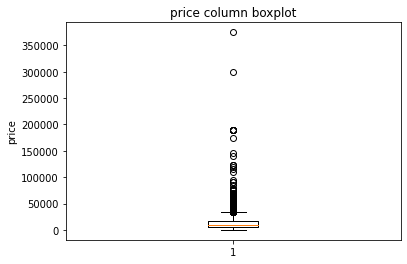

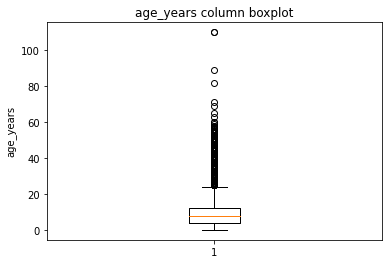

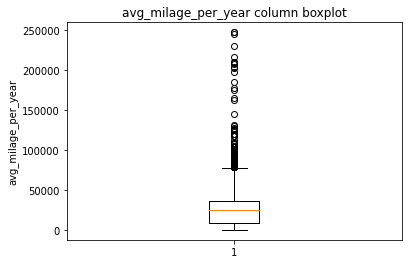

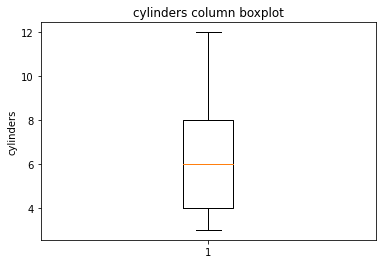

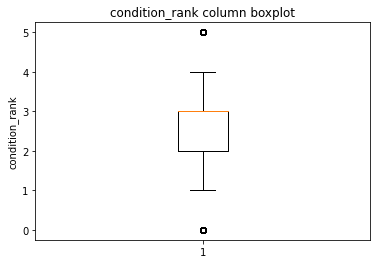

In [43]:
column_name = ['price','age_years','avg_milage_per_year','cylinders','condition_rank']
for i in column_name:
    fig = plt.boxplot(df[i])
    plt.title(f'{i} column boxplot')
    plt.ylabel(f'{i}')
    plt.show()

price column: From the boxplot above it looks like the median price is about 25000. The price column data is right skewed. Most cars are sold below 50000.

age_years: From the boxplot above it looks like the median age of vehicles is roughly, 10 years. It looks like the boxplot has no skew. Most cars are below 30 years old.

avg_milage_per_year: From the boxplot above it looks like the median average milage of a vehicle is roughly 30000 miles. The data in this column is slightly left skewed and it looks like most of the vehicles' average milage is below 100 000.

cylinders: From the boxplot above it looks like the median cylinder is 6 cylinders. It looks like this column has no skew. Most vehicles have cylinders between 4 and 8.

condition_rank: From the boxplot above the median condition_rank is 3, which means the vehicles are mostly in excellent condition. The median and the upper quartile are both 3, this means that the data is completely left skewed. Most vehicles are in ranks 4 and 1 meaning they are at least in fair condition and like new at best.


The above cells of code represent boxplots of the price, age_years,avg_milage_per_year, cylinders and condition_rank columns. 
For the price, age_years and avg_milage_per_year columns it is seen that there are a lot of outliers in the dataset. These outliers are mainly over the upper whisker of the dataset. 
It is observed that the cylinders column does not have any outliers.
Lastly, the condition_rank column has upper and lower outliers. 

## Study and treat outliers


The columns with outliers are the  price, age_years,avg_milage_per_year and condition_rank columns. In this section we will determine the upper and lower whisker of the dataset. 

In [44]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,age_years,avg_milage_per_year,condition_rank,weekday_posted,month_posted,year_posted
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.130810,97855.274954,39.55476,8.513906,24463.845337,2.637535,15.449491,6.628491,2018.307462
std,10040.803015,6.099381,1.658414,72938.736152,28.20427,6.112976,18234.646227,0.712447,8.736521,3.474134,0.461447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,5000.000000,2007.000000,4.000000,35896.000000,19.00000,4.000000,8974.000000,2.000000,8.000000,3.000000,2018.000000
50%,9000.000000,2011.000000,6.000000,99114.000000,33.00000,8.000000,24778.000000,3.000000,15.000000,7.000000,2018.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,53.00000,12.000000,36635.000000,3.000000,23.000000,10.000000,2019.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,110.000000,247500.000000,5.000000,31.000000,12.000000,2019.000000


The code below determines the lower and upper whisker of the data set using a function. 

In [45]:
def lowerf(data):
    q1,q3 = np.percentile(data,[25,75])
    
    iqr = q3 - q1
    
    lower_fence = q1 - (1.5*iqr)
    return lower_fence
    
def higherf(data):
    q1,q3 = np.percentile(data,[25,75])
    
    iqr = q3 - q1
    
    higher_fence = q3 + (1.5*iqr)
    return higher_fence

df_no = df

The cell below determines the lower limits then removes the outliers out of the data set that are below the data.

In [46]:
# Determine the lower limits for outliers
for x in df_no['condition_rank']:
    if x < lowerf(df_no['condition_rank']):
        df_no.drop(df_no[df_no['condition_rank']==x].index,inplace=True)

The cell below determines the upper limits then removes the outliers out of the data set that are above the data.

In [47]:
# Determine the upper limits for outliers
for y in df_no['price']:
    if y > higherf(df_no['price']):
        df_no.drop(df_no[df_no['price']==y].index,inplace=True)
        
for g in df_no['age_years']:
    if g > higherf(df_no['age_years']):
        df_no.drop(df_no[df_no['age_years']==g].index,inplace=True)
        

for v in df_no['avg_milage_per_year']:
    if v > higherf(df_no['avg_milage_per_year']):
        df_no.drop(df_no[df_no['avg_milage_per_year']==v].index,inplace=True)
        

for c in df_no['condition_rank']:
    if c > higherf(df_no['condition_rank']):
        df_no.drop(df_no[df_no['condition_rank']==c].index,inplace=True)

In [48]:
# Store data without outliers in a separate DataFrame
display(df_no.reset_index())

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_years,avg_milage_per_year,condition_rank,weekday_posted,month_posted,year_posted
0,0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,36250.0,2,23,6,2018
1,1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,7,22176.0,2,19,10,2018
2,2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,27500.0,4,7,2,2019
3,3,1500.0,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,unknown,False,2019-03-22,9,16,2.0,1,22,3,2019
4,4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,20226.0,3,2,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47544,51519,11750.0,2015,honda accord,excellent,4,gas,6.0,automatic,coupe,unknown,False,2018-11-24,89,3,2.0,3,24,11,2018
47545,51520,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,5,22034.0,4,3,10,2018
47546,51522,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,9,32000.0,3,15,11,2018
47547,51523,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,5,34893.0,2,2,7,2018


## Study core parameters without outliers

<AxesSubplot:>

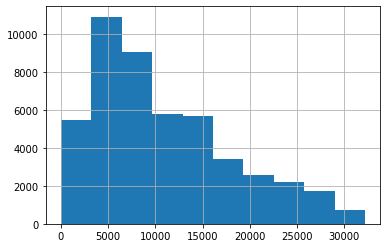

In [49]:
df['price'].hist()

<AxesSubplot:>

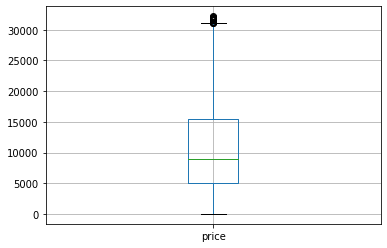

In [50]:
df_no.boxplot('price')

The price column with the dataset without the outliers has some datapoints that are just above the upper whisker. It is now clearer now that the median price of the listed vehicles is roughly 9 000.

<AxesSubplot:>

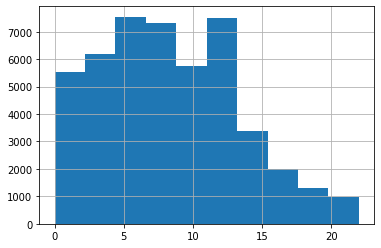

In [51]:
df['age_years'].hist()

<AxesSubplot:>

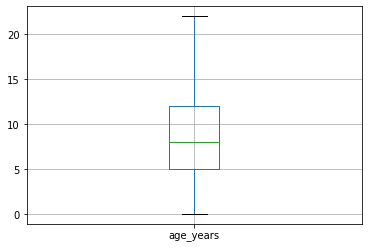

In [52]:
df_no.boxplot('age_years')

The age_years column from the dataset without outliers shows that the median age of vehicles that are sold in the dataset is estimated at 7 years. 

<AxesSubplot:>

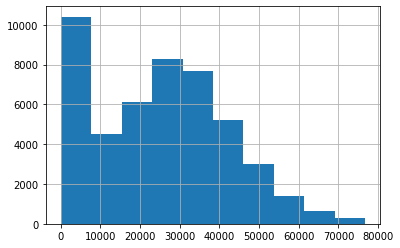

In [53]:
df['avg_milage_per_year'].hist()

<AxesSubplot:>

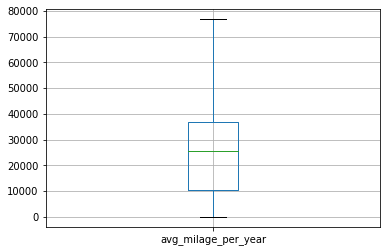

In [54]:
df_no.boxplot('avg_milage_per_year')

The avg_milage_per_year column in the dataset without outliers shows that the median average milage of the vehicles in the dataset is roughly 26 000 miles.

<AxesSubplot:>

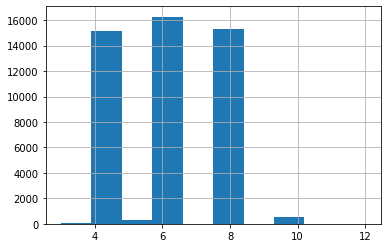

In [55]:
df['cylinders'].hist()

<AxesSubplot:>

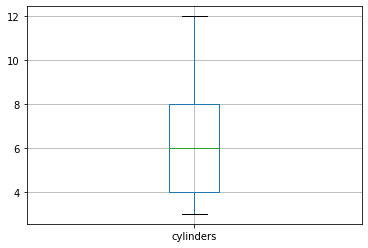

In [56]:
df_no.boxplot('cylinders')

The cylinders column from the dataset without outliers shows that the median cylinder type is 6 cylinders in most vehicles in the dataset.

<AxesSubplot:>

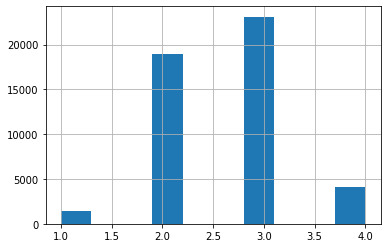

In [57]:
df['condition_rank'].hist()

<AxesSubplot:>

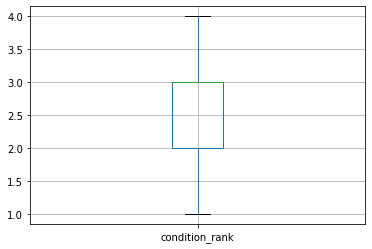

In [58]:
df_no.boxplot('condition_rank')

The condition_rank column in the dataset without outliers shows that the median and the upper quartile are the same. This means that the median of the vehicles are in excellent condition.

## Ads lifetime


In [59]:
#total days of advertisements
print(df_no['days_listed'].sum())

1879708


In [60]:
#median days_listed
print(df_no['days_listed'].median())

33.0


In [61]:
#mean days_listed
print(df_no['days_listed'].mean())

39.532019600832825


In [62]:
#shortest amount of days an ad was on display
print(df_no['days_listed'].min())

0


<AxesSubplot:>

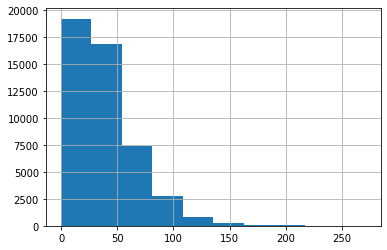

In [63]:
df_no['days_listed'].hist()

In [64]:
#longest amount of days an ad was on display
print(df_no['days_listed'].max())

271


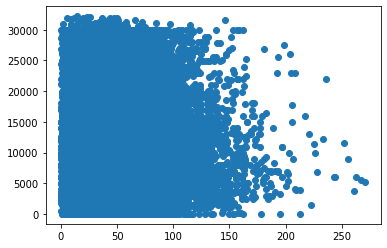

In [65]:
x=df_no['days_listed']
y=df_no['price']
plt.scatter(x,y)

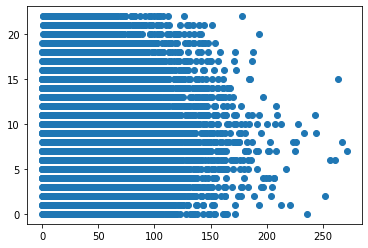

In [66]:
x=df_no['days_listed']
y=df_no['age_years']
plt.scatter(x,y)

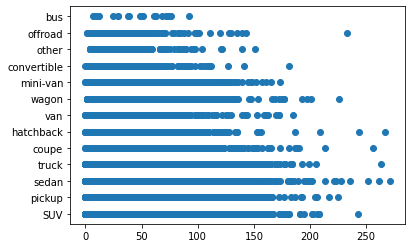

In [67]:
x=df_no['days_listed']
y=df_no['type']
plt.scatter(x,y)

The average lifetime of an ad is 33 days (which is the median/50th percentile value which does not consider the outliers). If an ad is removed less than the 25th percentile value, this is an abnormally quick. If it's been listed at days greater than (75th percentile value), it's abnormally long.These values are calculate with the inclusion of the outliers. So it is unnecesarry to filter out the outlier values as donr in the previous session.

## Average price per each type of vehicle

<AxesSubplot:xlabel='price', ylabel='type'>

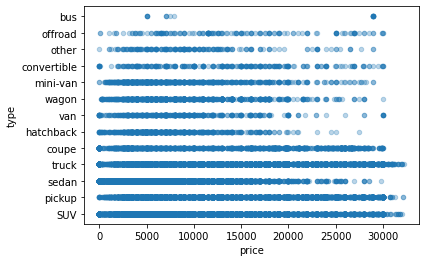

In [68]:
df_no.plot(x='price',y='type',kind='scatter',alpha=0.3)

In [69]:
report = (df_no.groupby(['type']).agg({'model': 'count', 'price': 'mean'}).rename(columns = {'model': 'ads', 'price': 'mean_price'}).sort_values(by = 'ads', ascending = False))

<AxesSubplot:>

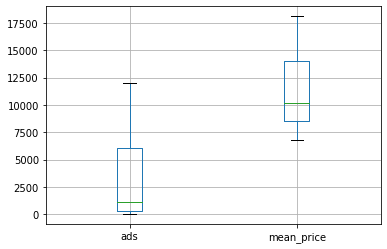

In [70]:
report.boxplot()

<AxesSubplot:xlabel='mean_price', ylabel='ads'>

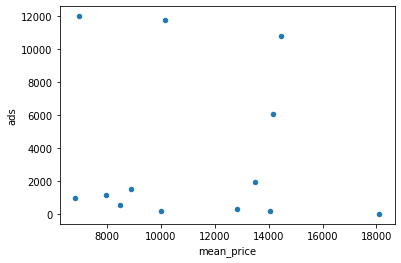

In [71]:
report.plot(x='mean_price',y='ads',kind='scatter')

<AxesSubplot:xlabel='type'>

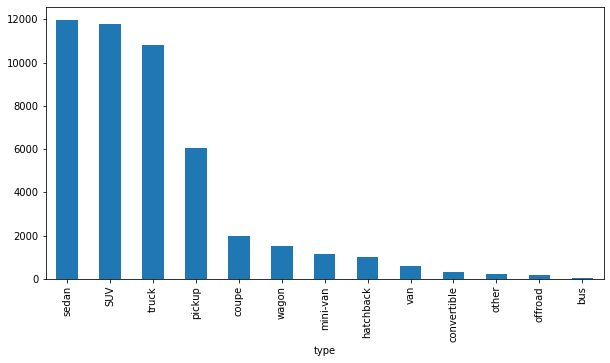

In [86]:
report['ads'].plot(kind = 'bar', figsize = (10, 5))

In [72]:
display(report)

,ads,mean_price
type,,
sedan,11968,6949.681400
SUV,11768,10167.607495
truck,10795,14462.642705
pickup,6046,14178.124876
coupe,1974,13478.690983
wagon,1515,8873.323432
mini-van,1149,7954.570061
hatchback,1007,6808.635551
van,576,8490.215278


According to the different graphs and table above it is seen that the median mean price of the types of vehicles sold is just above 100 000 and the mean price column data is right skewed. The ads column median is roughly a 1000 and the this column is also right skewed. 

The vehicle type with the most ads is a sedan, but it has the lowest mean price out of all the different types of vehicles. The bus type has the lowest ads but has the highest price out of all the vehicle types. This shows that the type of vehicle and price are independent and have no relation to each other. It makes sense to see most ads on sedans and SUV as these are the vehicles that most of the populations buys and uses.

## Price factors

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='price'>,
        <AxesSubplot:xlabel='days_listed', ylabel='price'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='model_year'>,
        <AxesSubplot:xlabel='days_listed', ylabel='model_year'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='model_year'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='model_year', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='days_listed', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='condition_rank'>],
       [<AxesSu

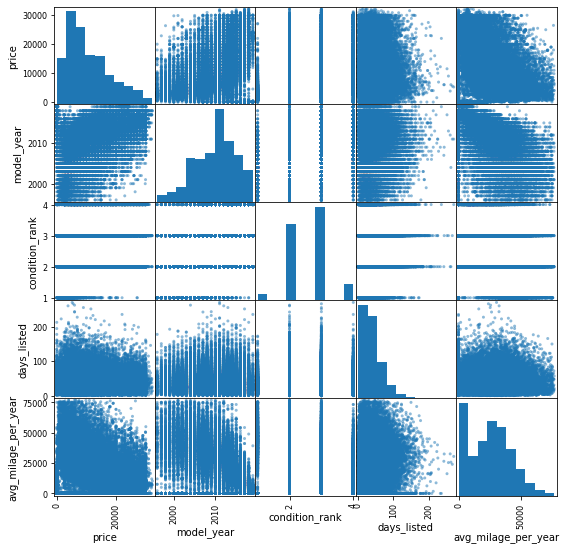

In [74]:
pd.plotting.scatter_matrix(df_no[['price','model_year','condition_rank','fuel','days_listed','avg_milage_per_year','type']], figsize=(9,9))

<AxesSubplot:xlabel='transmission', ylabel='price'>

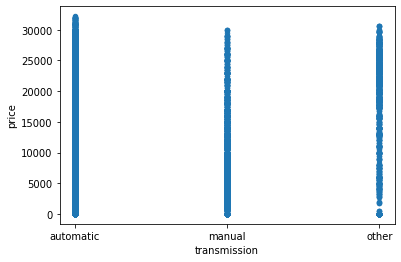

In [75]:
df_no.plot(y='price',x='transmission',kind='scatter') 

<AxesSubplot:xlabel='price', ylabel='paint_color'>

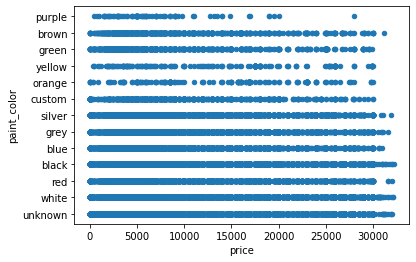

In [76]:
df_no.plot(x='price',y='paint_color',kind='scatter')

<AxesSubplot:xlabel='price', ylabel='fuel'>

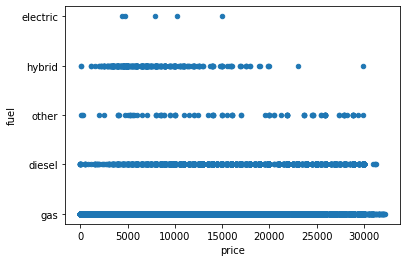

In [77]:
df_no.plot(x='price',y='fuel',kind='scatter')

<AxesSubplot:xlabel='price', ylabel='type'>

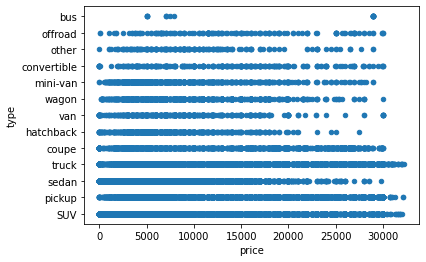

In [78]:
df_no.plot(x='price',y='type',kind='scatter')

The graphs above show that the different parameters that affect the price. It is seen that from the matrix that the higher the model year the higher the price of the vehicle. It is also seen that cars that are listed for too long are more likey to be sold at a lower price. It is also seen that a car is more likely to be sold at a lower price if it has a high average milage. Cars with an automatic transmission are slightly more likely to have a higher price. The color of the vehicle has no relationship to the price. Electric cars are at a price range of 5000 to 20 000. It is also seen that there is a larger variety of gas and diesel cars. Most hybrid cars are priced below 15 000.

In [79]:
df_suv = df_no[df_no['type'] == 'SUV']
df_sedan = df_no[df_no['type'] == 'sedan']

In [80]:
display(df_suv)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_years,avg_milage_per_year,condition_rank,weekday_posted,month_posted,year_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,36250.0,2,23,6,2018
7,15990.0,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,6,27368.0,3,7,1,2019
8,11500.0,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,6,26044.0,3,16,7,2018
9,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,11,36798.0,3,15,2,2019
14,12990.0,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,10,33071.0,3,31,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500.0,2012,chevrolet traverse,good,6,gas,144500.0,automatic,SUV,unknown,True,2019-03-05,1,7,36125.0,2,5,3,2019
51496,4999.0,2002,toyota 4runner,excellent,6,gas,177901.0,automatic,SUV,unknown,True,2018-05-26,59,16,44475.0,3,26,5,2018
51500,6995.0,2012,buick enclave,excellent,6,gas,157000.0,automatic,SUV,white,True,2018-08-04,17,6,39250.0,3,4,8,2018
51502,7995.0,2011,chevrolet equinox,like new,4,gas,111088.0,automatic,SUV,unknown,False,2019-04-01,175,8,27772.0,4,1,4,2019


In [81]:
display(df_sedan)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_years,avg_milage_per_year,condition_rank,weekday_posted,month_posted,year_posted
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,27500.0,4,7,2,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,20226.0,3,2,4,2019
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,14488.0,3,20,6,2018
6,12990.0,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,19803.0,3,27,12,2018
11,8990.0,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,7,27786.0,3,28,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750.0,2005,ford taurus,excellent,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,13,27550.0,3,10,8,2018
51520,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,5,22034.0,4,3,10,2018
51522,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,9,32000.0,3,15,11,2018
51523,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,5,34893.0,2,2,7,2018


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='price'>,
        <AxesSubplot:xlabel='days_listed', ylabel='price'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='model_year'>,
        <AxesSubplot:xlabel='days_listed', ylabel='model_year'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='model_year'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='model_year', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='days_listed', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='condition_rank'>],
       [<AxesSu

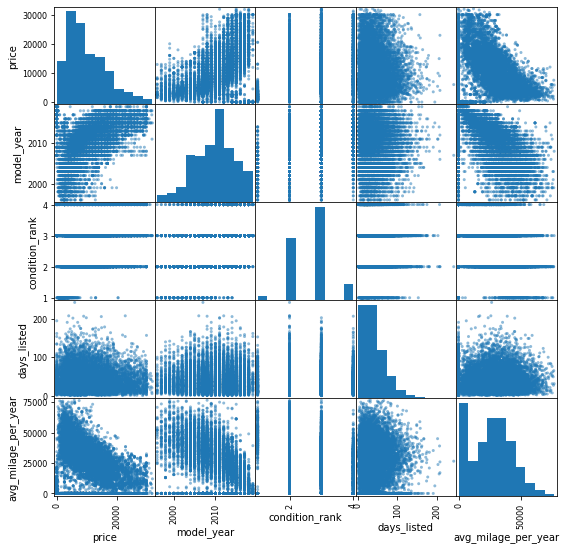

In [82]:
pd.plotting.scatter_matrix(df_suv[['price','model_year','condition_rank','fuel','days_listed','avg_milage_per_year','type']], figsize=(9,9))

Based on the graphs above for SUV's it is seen that as the model year of the car is more recent the higher the price of the car, as there appears to be a positive linear graph between price and model year. It is seen that cars that are in fair condition mostly sell for 10000 or less. It is also seen that cars that are between 20000 and 30000 are listed for roughly 100 days and cars that a sold for less than 20000 have a tendency to be listed for over 100 days but less than 200 days. Lastly, it is seen that when the average milage of a vehicle is high the price tends to decrease. There's a negative linear relationship between the price of the vehicle and the average milage.

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='price'>,
        <AxesSubplot:xlabel='days_listed', ylabel='price'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='model_year'>,
        <AxesSubplot:xlabel='days_listed', ylabel='model_year'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='model_year'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='model_year', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='days_listed', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='avg_milage_per_year', ylabel='condition_rank'>],
       [<AxesSu

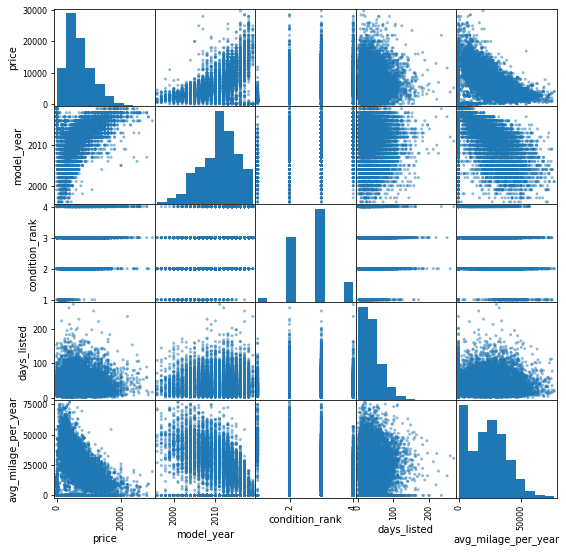

In [83]:
pd.plotting.scatter_matrix(df_sedan[['price','model_year','condition_rank','fuel','days_listed','avg_milage_per_year','type']], figsize=(9,9))

In [84]:
# filter value counts that are less 50 instances from the data for analysis
df_suv = df_suv[df_suv['paint_color'].map(df_suv['paint_color'].value_counts()) > 50]
df_suv = df_suv[df_suv['transmission'].map(df_suv['transmission'].value_counts()) > 50]
df_sedan = df_sedan[df_sedan['paint_color'].map(df_sedan['paint_color'].value_counts()) > 50]
df_sedan = df_sedan[df_sedan['transmission'].map(df_sedan['transmission'].value_counts()) > 50]

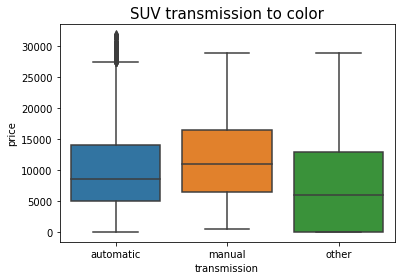

In [99]:
# plot for transmission categorical value
sns.boxplot(x ='transmission', y ='price', data = df_suv)
plt.title('SUV transmission to color', fontsize = 15)
plt.show()


From the graph above it is seen that SUV's with a manual transmission mostly sell for over 10000 and SUVs with a automatic transmission mostly sell for under 10000. All three transmission types graphs are right skewed.

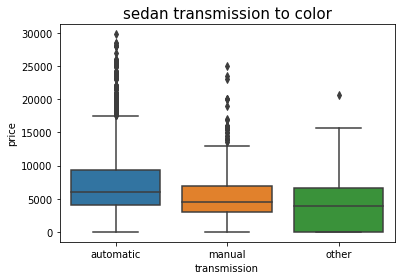

In [101]:
sns.boxplot(x ='transmission', y ='price', data = df_sedan)
plt.title('sedan transmission to color', fontsize = 15)
plt.show()

This graph above shows that sedans with a automatic transmission mostly sell for over 5000 and sedans with a manual transmission mostly sell for just under 5000. The automatic and manual transmission boxplots are right skewed and the other transmission type is left skewed.

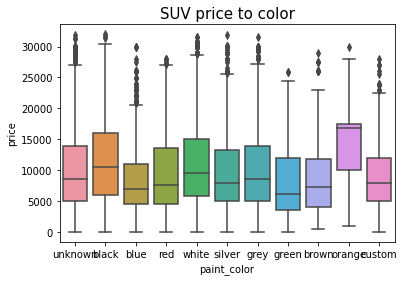

In [100]:
# plot for paint categorical value
sns.boxplot(x ='paint_color', y ='price', data = df_suv)
plt.title('SUV price to color', fontsize = 15)
plt.show()


From the above graph it is seen that the expensive SUVs are orange in colour with a median price of over 15000 and the least expensive SUVs are the green ones with a median price of roughly 6000. The orange boxplot is left skewed but the rest are mostly right skewed.

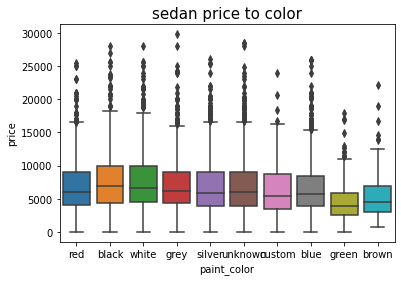

In [103]:
sns.boxplot(x ='paint_color', y ='price', data = df_sedan)
sns.color_palette("Paired")
plt.title('sedan price to color', fontsize = 15)
plt.show()


In [105]:
df_sedan['price'][df_sedan['paint_color']=='black'].median()

6900.0

In [106]:
df_sedan['price'][df_sedan['paint_color']=='green'].median()

3900.0

The graph above shows that the most expansive sedans are black in colour with a median price of 6900 and the sedans that are the least expensive have a median price of 3900. All the boxplots are right skewed.

Based on the graphs above about the sudan vehicles, it is seen that the more recent the model year there is a tendency for the price to increase aswell. There is a positive linear relationship between the vehicle price and the model year. It is also seen that cars that are in fair condition usually sell for 10000 or less and that are in good condition mostly sell for less than 20000. The price, days_listed graph shows that most sedans sell within 100 days of them being listed and that most of these cars sell for less than 20000. Lastly, it is seen that when the average milage increases there is a tendency for the price to decrease. It looks like there is a negative linear relationship between the vehicle price and the average milage.

## General conclusion

From the original dataset it was found that there were no duplicates. The columns with the missing values such as the model_year were filled with the median model year milage of vehicles with similar odometers. The missing values in the cylinder column were filled with the median cylinder of vehicles of the same type. The missing values in the odometer column were filled with the median milage of the vehicles with the same model year. The missing paint type was filled with the median color which is white. 

The Data types of the price column were changed to float, model_year to datetime, is_4wd to boolean and lastly date_posted to datetime. The columns age_years were added to get the age of each vehicle and condition_rank was added to put the condition of the vehicles in a numerical scale.

Boxplots were used to determine the outliers of each column in the dataset. A function was created to determine the lower and upper whisker in eeach column and remove these outliers in  a new dataset called df_no. Boxplots were then plotted to see how these changes have affected the dataset. It was found that the median and distribution of the dataset was clearer. 

After the analysis we can conclude that the factors that affect the price of the vehicle are the model year, the newer the car the higher the selling price. The milage the higher the average milage the lower the price. The condition of the vehicle excellent and good condition vehicles have a higher price and sell faster. The transmission, it is seen that an automatic is slightly more likely to cost more than a manual transmission. It is seen that electric and hybrid cars are likely to be sold for less than 15 000. It is also found that sedans and SUV's have the most ads. These vehicle types usually sell within 100 days. The fair condition vehicles of both SUV's and sedans usually sell for less than 10000.
It is seen that SUVs with a manual transmission have a higher median price than SUVs with a automatic transmission. It is also seen that sedans with a automatic transmission have a slightly higher median price than sedans with a manuanal transmission. SUVs that are orange in colour tend to be the most expensive with a median price of over 15000 and green SUVs are the least expensive with a median price of about 6000. Lastly, black sedans are the most expensive with a median price of 6900 and green sedans are the least expensive with a median price of 3900.